In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

%load_ext autoreload
%autoreload 2

Sun Jul 19 10:48:31 PDT 2020


In [2]:
import vivarium_uw_covid as vuc

# Refactor COVID sim use data from artifact

Test with Wisconsin, since the UWisc team is interested in using this approach

In [3]:
art_fname='/ihme/homes/abie/projects/2020/vivarium_uw_covid/src/vivarium_uw_covid/artifacts/wisc.hdf'
data = vuc.data_dict_from_artifact(art_fname)

In [4]:
beta_final = vuc.make_beta(data['coeffs'], data['df_covs'], data['loc_id'], data['beta_fit'])

# Run a simulation with monthly testing of an on-campus population of 30,000 and 50% mixing

In [5]:
alt_covs = vuc.make_alternative_covariates(
                data['df_covs'], data['loc_id'],
                data['t0'],
    
                mask_use=70/100,           # high level of masking
                mobility_reference=0,     # students move around a lot
            )
beta_alt_final = vuc.make_beta(data['coeffs'], alt_covs, data['loc_id'], data['beta_fit'])

In [6]:
n_draws = 5
n_on_campus = 30_000
mixing_parameter = 0.50

test_rate = (1 / 31)
tests_per_week = test_rate * 7 * n_on_campus
tests_per_week

6774.193548387097

In [7]:
%%time

np.random.seed(12345)  # set random seed for reproducilibity
df_individual_hybrid_list, df_compartment_hybrid_list = \
       vuc.run_hybrid_model(n_simulants=n_on_campus,
                         
                            mixing_parameter=mixing_parameter,
                            n_draws=n_draws,
                            beta_agent=beta_alt_final,
                            beta_compartment=beta_final,
                            
                            params=data['params'],
                            start_time=data['t0'],
                            initial_states_agent=data['initial_states'],
                            initial_states_compartment=data['initial_states'],
                            
                            use_mechanistic_testing=True,
                            test_rate=test_rate,
                            test_positive_rate=test_rate,
                            
                           )


CPU times: user 31.6 s, sys: 53.3 ms, total: 31.6 s
Wall time: 31.7 s



Cumulative infections on 12/11/20:
    130 (95% UI 124 to 184)



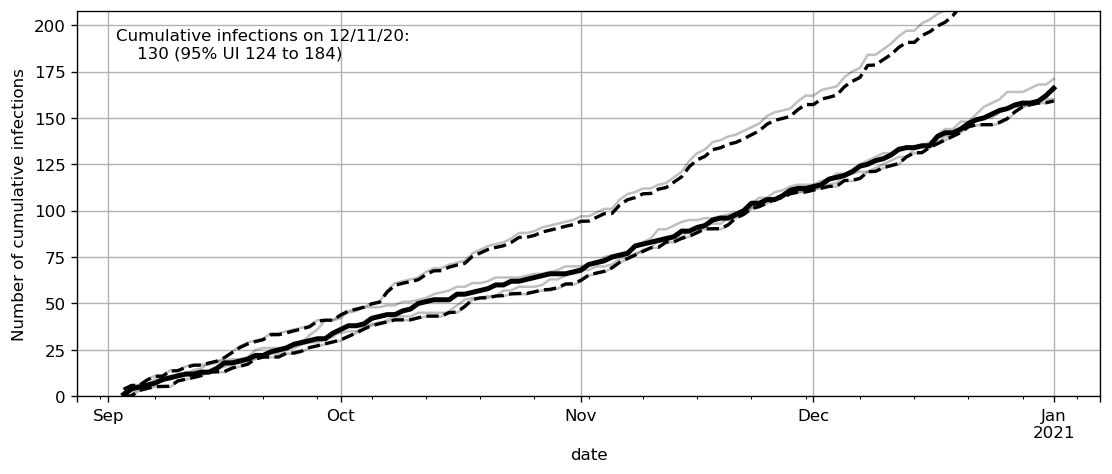

In [8]:
vuc.plot_results(df_individual_hybrid_list,
                 metric='cumulative_infections')


Cumulative infections on 12/11/20:
    10,659 (95% UI 8,334 to 29,631)



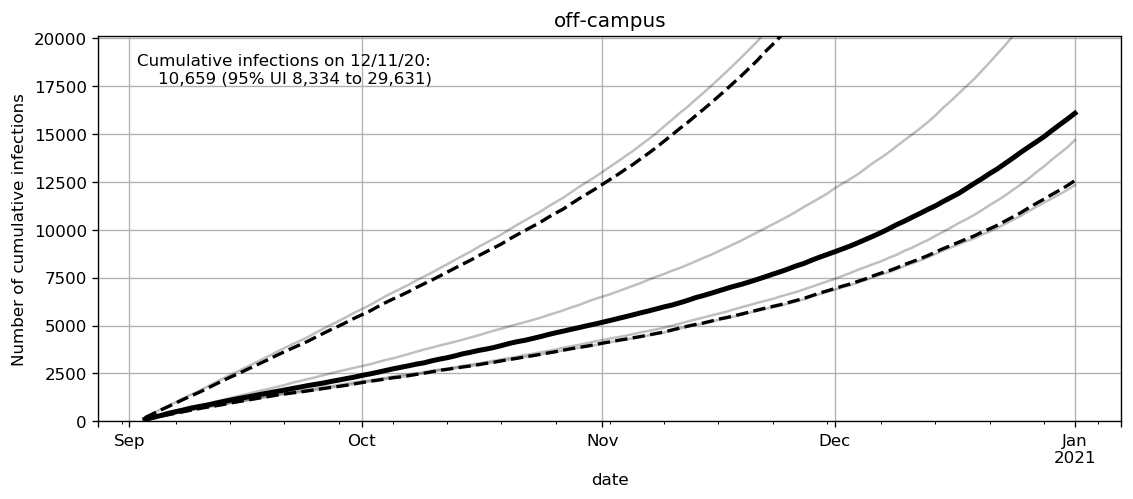

In [9]:
vuc.plot_results(df_compartment_hybrid_list,
                 title='off-campus',
                 metric='cumulative_infections')